In [1]:
import pandas as pd

from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Dimension reduction and clustering libraries
import umap
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

In [2]:
df_clean=pd.read_csv('../output/df_clean.csv')
df_dumb=pd.read_csv('../output/df_dumb.csv')

In [3]:
sns.set(style='white', rc={'figure.figsize':(10,8)})

In [36]:
df_dumb

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,euro_income,age,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,0,1,1,1,1,1,0,3,14625.0,44,...,1,0,0,0,0,1,0,0,0,0
1,0,1,1,1,1,1,0,3,14625.0,44,...,1,0,0,0,0,1,0,0,0,0
2,0,1,1,0,0,0,0,2,40950.0,51,...,1,0,0,0,0,1,0,0,0,0
3,1,0,1,1,1,1,0,3,20475.0,35,...,1,0,0,0,0,1,0,0,0,0
4,1,0,1,0,0,0,0,2,23400.0,62,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33105,1,0,1,0,0,1,0,2,16380.0,65,...,1,0,0,0,0,1,0,0,0,0
33106,1,0,1,0,0,0,0,1,23400.0,65,...,0,1,0,0,0,1,0,0,0,0
33107,1,0,1,0,0,0,0,1,23400.0,65,...,0,1,0,0,0,1,0,0,0,0
33108,0,1,1,1,0,0,0,3,29250.0,44,...,1,0,0,0,0,1,0,0,0,0


In [37]:
standard_embedding = umap.UMAP(random_state=42).fit_transform(df_dumb)


/home/diegon8/.local/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [ ]:
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=kmeans_labels, s=0.1, cmap='Spectral');


In [26]:
kmeans_labels = cluster.KMeans(n_clusters=10).fit_predict(df_dumb)
len(kmeans_labels)

33110

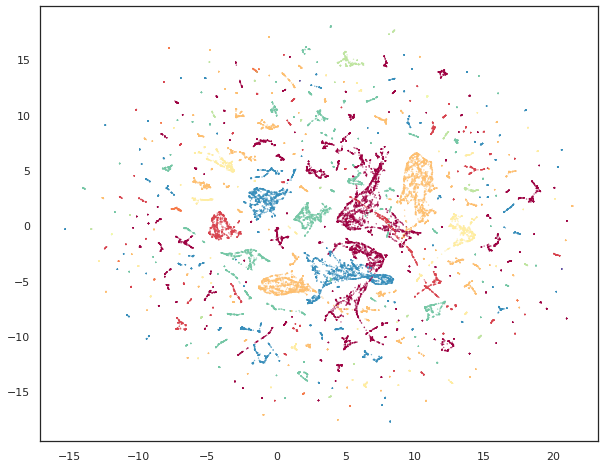

In [27]:
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=kmeans_labels, s=0.1, cmap='Spectral');


In [39]:
#print(adjusted_rand_score(df_dumb, kmeans_labels),adjusted_mutual_info_score(df_dumb, kmeans_labels))

In [42]:
#df_clean_drop=df_clean.drop(['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE'],axis=1)

In [43]:
df_clean_drop

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,euro_income,age,years_employed,pay_danger
0,0,1,1,1,1,1,0,3,14625.0,44,2,240.0
1,0,1,1,1,1,1,0,3,14625.0,44,2,240.0
2,0,1,1,0,0,0,0,2,40950.0,51,3,235.0
3,1,0,1,1,1,1,0,3,20475.0,35,10,230.0
4,1,0,1,0,0,0,0,2,23400.0,62,0,220.0
...,...,...,...,...,...,...,...,...,...,...,...,...
33105,1,0,1,0,0,1,0,2,16380.0,65,5,-58.0
33106,1,0,1,0,0,0,0,1,23400.0,65,0,-58.0
33107,1,0,1,0,0,0,0,1,23400.0,65,0,-58.0
33108,0,1,1,1,0,0,0,3,29250.0,44,6,-58.0


/home/diegon8/.local/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


33110


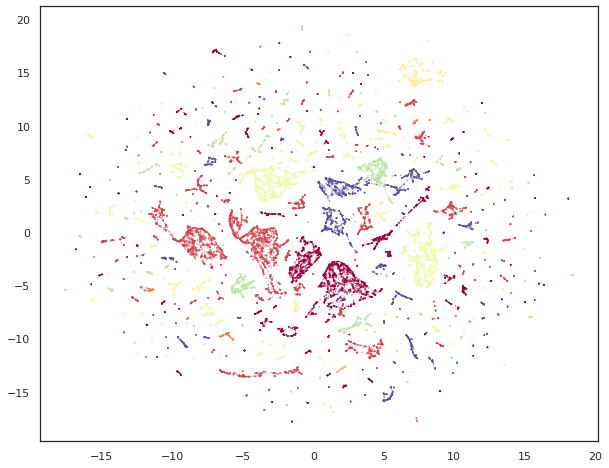

In [46]:
standard_embedding2 = umap.UMAP(random_state=42).fit_transform(df_clean_drop)
kmeans_labels2 = cluster.KMeans(n_clusters=10).fit_predict(df_clean_drop)
print(len(kmeans_labels))
plt.scatter(standard_embedding2[:, 0], standard_embedding2[:, 1], c=kmeans_labels2, s=0.1, cmap='Spectral');


In [50]:
reducer = umap.UMAP(random_state=42)
reducer.fit(df_clean_drop)

/home/diegon8/.local/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


UMAP(random_state=42)

In [52]:
embedding = reducer.transform(df_clean_drop)
# Verify that the result of calling transform is
# idenitical to accessing the embedding_ attribute
assert(np.all(embedding == reducer.embedding_))
embedding.shape


(33110, 2)

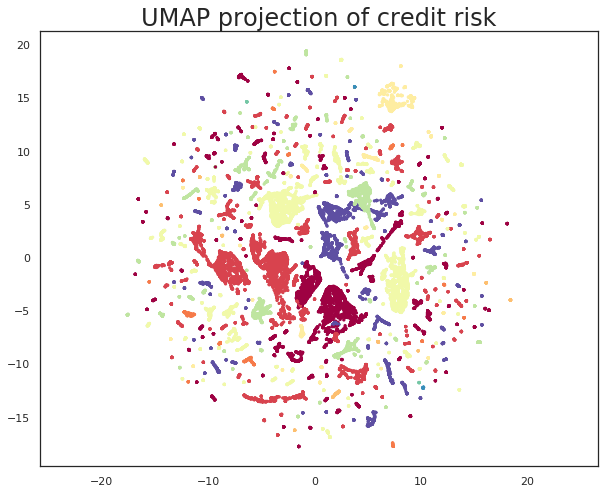

In [56]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=kmeans_labels2, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar
plt.title('UMAP projection of credit risk', fontsize=24);